# AI- Smoke Detector

### Team Name: Peerless

#### Team Members:  Hema Sai Ari, Sai Kiran Reddy Rajannagari, Hima bindu Krishnouth, Maruthi Sai Vishnu Varma Vanapala, Hema Venkatesh Prasad Sabbavarapu



Each year there is an average of 358,000 house fires in USA and these fires result in 7 deaths per day.That is the reason smoke detectors are made mandatory in every home.In the U.S. 96% of all homes have smoke alarms and approximately 20% of homes with smoke alarms have non-operational smoke alarms. 
With an increasing number of smoke detectors, false alarms became a problem. The number of false fire alarms is increasing continuously, which is a severe issue for firefighters.

So Stefan Blattmann, a software engineer and volunteer fire fighter with 6 years of experience in development engineer firmware and electronics decided to create a new AI based smoke detector which is a support to certified preexisting smoke detector.

For his project he collected data from various enivornmental conditions using an IOT device(A device with sensors to collect differnt infomation and a aurdino board to store them) and sampled them to make sure we have enough data for our analysis.

## Aim: Finding the best model to deploy into AI based Smoke Detector

#### About data set
Our data set consists of more than 60000 readings(63620 in exact) and 15 attributes(columns or independent varaible) and our target variable is Fire Alarm which is a binary variable with 0 and 1 where 0 indicates No Smoke and 1 indicates Smoke



### Importing all required packages

In [265]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc_params

random_seed = 1
np.random_seed = random_seed

#### Importing the data set

In [266]:
smoke_df=pd.read_csv('smoke_detection_iot.csv')  

In [267]:
smoke_df.head(10)  #getting the overview of the dataframe

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


#### Checking for the number of null values in each column

In [268]:
smoke_df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

### replacing the null value with name

data['OCCUPATION_TYPE'].fillna('Other',inplace=True)   # we are storing "other" in place of nulls

syntax:
dataframe['column name'].fillna('name',inplace=True)

#if null vlaues are to be replaced with some name

### replcing the null value with average value
data['OCCUPATION_TYPE'].fillna(mean(data['OCCUPATION_TYPE']),inplace=True)

#replacing the null value with mean 

#### Converting all the column name into simpler names so that we can call them easily in our futhure code

In [269]:
smoke_df.columns = [s.strip().replace(' ', '_') for s in smoke_df.columns] #basic
smoke_df.columns = [s.strip().replace('.', '_') for s in smoke_df.columns] 
smoke_df.columns=[s.strip().replace('Temperature[C]','Temperatur_C') for s in smoke_df.columns]
smoke_df.columns=[s.strip().replace('TVOC[ppb]','TVOC_ppd') for s in smoke_df.columns]
smoke_df.columns=[s.strip().replace('eCO2[ppm]','eCO2_ppm') for s in smoke_df.columns]
smoke_df.columns=[s.strip().replace('Pressure[hPa]','Pressure_hpa') for s in smoke_df.columns]
smoke_df.columns=[s.strip().replace('Humidity[%]','Humidity_percent') for s in smoke_df.columns]

smoke_df.columns

Index(['Unnamed:_0', 'UTC', 'Temperatur_C', 'Humidity_percent', 'TVOC_ppd',
       'eCO2_ppm', 'Raw_H2', 'Raw_Ethanol', 'Pressure_hpa', 'PM1_0', 'PM2_5',
       'NC0_5', 'NC1_0', 'NC2_5', 'CNT', 'Fire_Alarm'],
      dtype='object')

#### Dropping the unnessary columns like indexing column (Unnamed:_0), time stamp (UTC), sample counter (CNT))

In [270]:
smoke_df=smoke_df.drop(columns=['Unnamed:_0','UTC','CNT'])

In [271]:
smoke_df.columns

Index(['Temperatur_C', 'Humidity_percent', 'TVOC_ppd', 'eCO2_ppm', 'Raw_H2',
       'Raw_Ethanol', 'Pressure_hpa', 'PM1_0', 'PM2_5', 'NC0_5', 'NC1_0',
       'NC2_5', 'Fire_Alarm'],
      dtype='object')

#### Getting the disturbution plot for main attributes 

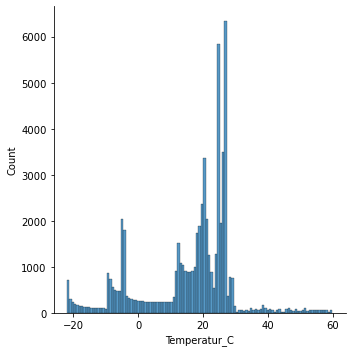

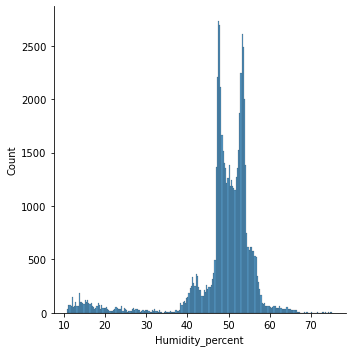

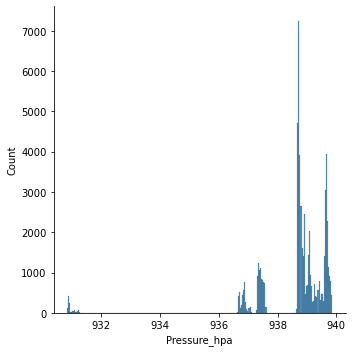

In [272]:
sns.displot(smoke_df['Temperatur_C'])
sns.displot(smoke_df.Humidity_percent)
sns.displot(smoke_df.Pressure_hpa)

#### Checking for the correlation

In [273]:
c=smoke_df.corr()

#### Corrplot to get the co-relationship between attributes

<AxesSubplot:>

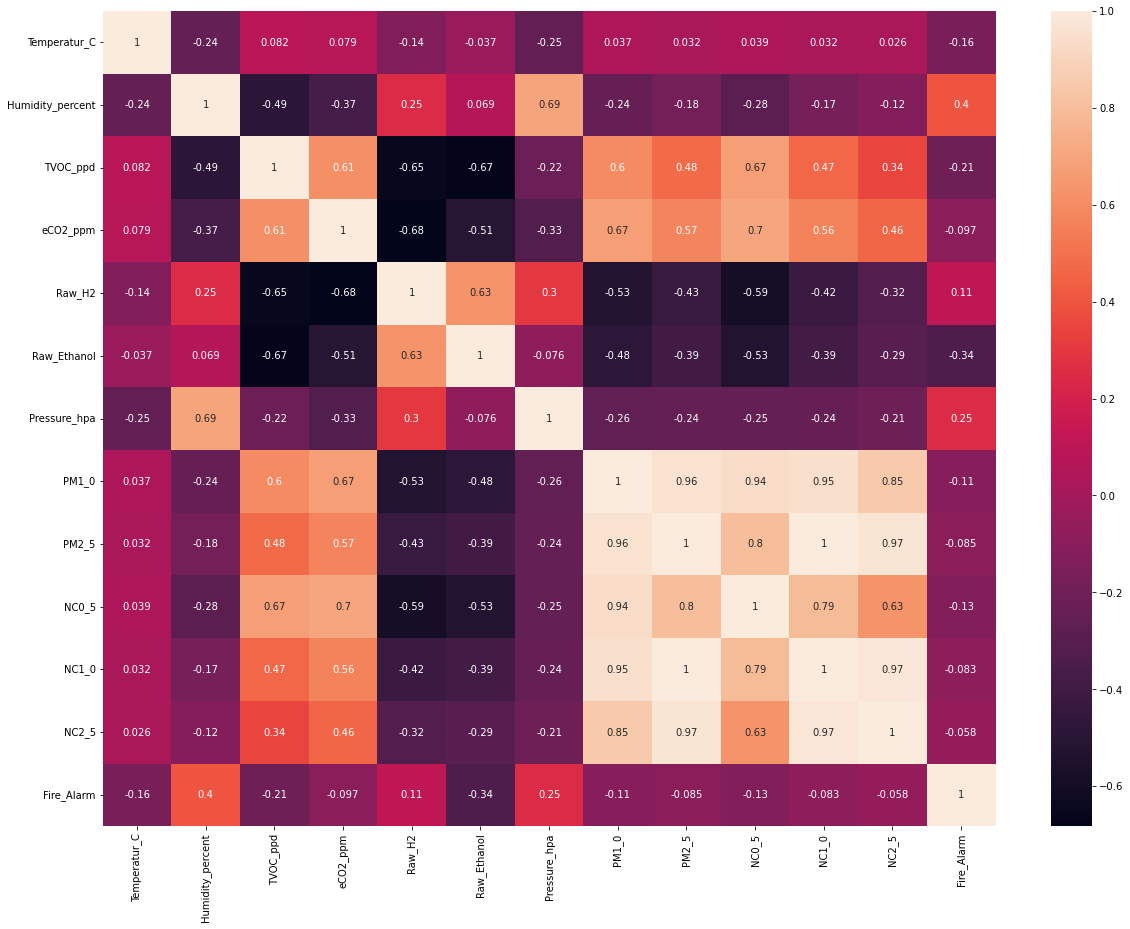

In [274]:
plt.figure(figsize=(20,15))
sns.heatmap(c,annot=True)

We can observe that there are few attributes which are realted(co related) postively to the target variable which means is their values increases then the target variable value will also increase and few attriburtes are negatively corelated which means that if those atributes increases then the target variable decreases.

#### lets check in detail how the each attributes are related to the target variable(Fire Alarm)

In [275]:
c.Fire_Alarm.sort_values(ascending=False)

Fire_Alarm          1.000000
Humidity_percent    0.399846
Pressure_hpa        0.249797
Raw_H2              0.107007
NC2_5              -0.057707
NC1_0              -0.082828
PM2_5              -0.084916
eCO2_ppm           -0.097006
PM1_0              -0.110552
NC0_5              -0.128118
Temperatur_C       -0.163902
TVOC_ppd           -0.214743
Raw_Ethanol        -0.340652
Name: Fire_Alarm, dtype: float64

In [276]:
# we can observe how various variables effect our target variable

#### Checking the type of our target variable and changing it to categorical value if it is not

In [277]:
smoke_df.Fire_Alarm.unique()

array([0, 1], dtype=int64)

In [278]:
#changing the target variable from int type to categorical type

In [279]:
smoke_df.Fire_Alarm=smoke_df.Fire_Alarm.astype("category")
smoke_df.Fire_Alarm.unique()

[0, 1]
Categories (2, int64): [0, 1]

#### Checking the value counts for target column

In [280]:
smoke_df.Fire_Alarm.value_counts()

# 1- Fire is there
# 0- No fire

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

Text(0.5, 1.0, 'Fire Alarm')

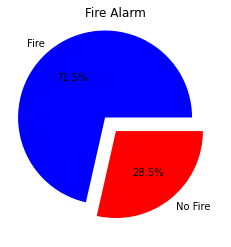

In [281]:
#plotting the percentage of disturbution of 0's and 1's

plt.pie(smoke_df.Fire_Alarm.value_counts(),[0.2,0],labels=['Fire','No Fire'],autopct='%1.1f%%',colors=['blue','red'])
plt.title('Fire Alarm')
#plt.show()

- We can observe that there is imbalance in the data 
- There are 71.5 percent 1(Fire) and 28.5% 0's(No Fire)

## Adressing the data imbalance issue 

There are various wasy to adress the data imbalance issue. Few of them are
> Over sampling
    
          -Sampling to increase the variables with low count. In our data if we use oversampling technique the count of 0's will increase untile they are equal to count of 1's
- Advatages: we will have more data to do analysis
- Disadvantages: this data is randomly generated so we might have to face few false values and we might get either overfitting or underfitting 
   
> Under sampling

          -Sampling to decrease the count of variables with more values. In this data if we use under sampling technique we will reduce the count of 1's unitle they are equal to count of 0's
- Advantages: run time will decrease as data is decreased
- Disadvantages: we will loose valiable data which can result in wrong analysis

> Deciding the right evalution metrices
            
            - Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous.So as we have the data imbalance issue we can consider the F1 score as the best evalution metrices for evaluating our models.


## Deciding on the best evalution metrices

#### Our aim is to reduce the True negative(False alarms) but the false negatives(Not detecting smoke even if it there)is more  dangerous and cannot be neglected when compared to true negative so we should consider Recall score as the best evaluation metrices but as we have the data imbalance issue we should consider "F1 score" as the best evalution metrices for evaluting our models. F1 score is the harmonic mean of precision ad recall so by using the f1 score we can get to consider both recall and precision.

### So, our best evalution metrices is F1 score



#### Splitting the data into train and validation/test set with a test size of 30%(i.e 70-30 split)

In [282]:
X_names = list(smoke_df.columns)
X_names.remove('Fire_Alarm')
X = smoke_df[X_names]
y = smoke_df['Fire_Alarm']

train_df, validation_df = train_test_split(smoke_df, test_size=0.3, random_state=1)

In [283]:
X_train = train_df.drop(columns=['Fire_Alarm'])
y_train = train_df.Fire_Alarm
X_test = validation_df.drop(columns=['Fire_Alarm'])
y_test = validation_df.Fire_Alarm

In [284]:
f_count = (train_df.Fire_Alarm==1).sum()
f_count

31421

In [285]:
nf_count = (train_df.Fire_Alarm==0).sum()
nf_count

12420

#### Using oversamling technique on train data set to adress the data imbalance issue

In [286]:
nf_df  = train_df.loc[train_df.Fire_Alarm==0]
df_oversampled = nf_df.sample(n=f_count-nf_count,replace=True)

train_df = pd.concat([train_df, df_oversampled], ignore_index=True)
train_df.Fire_Alarm.value_counts()

0    31421
1    31421
Name: Fire_Alarm, dtype: int64

Text(0.5, 1.0, 'Fire Alarm')

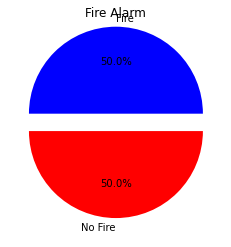

In [316]:
plt.pie(train_df.Fire_Alarm.value_counts(),[0.2,0],labels=['Fire','No Fire'],autopct='%1.1f%%',colors=['blue','red'])
plt.title('Fire Alarm')
#plt.show()

## k-Nearest Neighbour(kNN) 

A data classification technique known as the k-nearest neighbors (KNN) algorithm calculates the likelihood that a data point will join one group or another, based on which group the data points closest to it are a part of.
It will consider k nearst neibhours for the decision

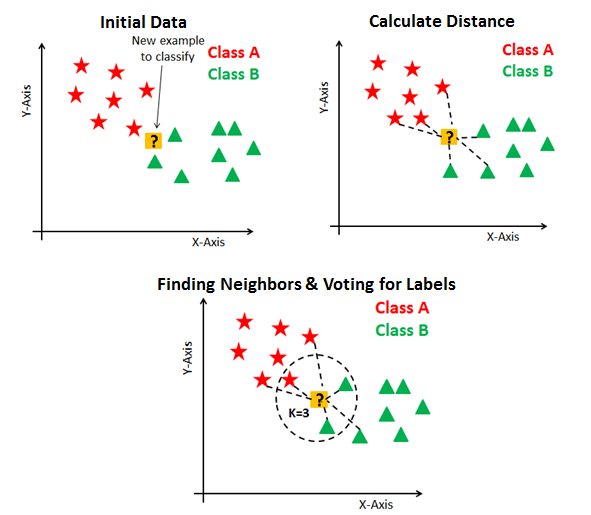

#### kNN model is sensitive to differences in scale therefore, we should begin by eliminating any differences in scale between the predictors/features. To accomplish this, we will standardize the  variable.


In [287]:
# create a standard scaler and fit it to the training set of predictors
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and validation sets
X_train = scaler.transform(X_train) # train_predictors is not a numpy array
X_test = scaler.transform(X_test)

In [57]:
results = []
for k in range(1,int(len(y_train)**0.5),2):
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results.append ({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

In [58]:
results_df.loc[[results_df.accuracy.idxmax()]]

,k,accuracy,precision,recall,f1
0,1,0.999681,0.999625,0.999925,0.999775


In [59]:
results_df.loc[[results_df.precision.idxmax()]]

,k,accuracy,precision,recall,f1
0,1,0.999681,0.999625,0.999925,0.999775


In [60]:
results_df.loc[[results_df.recall.idxmax()]]

,k,accuracy,precision,recall,f1
0,1,0.999681,0.999625,0.999925,0.999775


In [61]:
results_df.loc[[results_df.f1.idxmax()]]

,k,accuracy,precision,recall,f1
0,1,0.999681,0.999625,0.999925,0.999775


We can observe that all the best scores are acheived at k=1 which is common because k=1 means it will only consider one nearest neibhgour ad decidde on it so we are getting the best scores at k=1 which in reality is not the best k value so by considering the rule of tumb which is sqaue root of total number of observations. As we have 63620 observations the square root of it is 250.25 so lets round it to the nearest odd value i.e k=251. Now lets find the scores at k=251 

In [294]:
knn = KNeighborsClassifier(n_neighbors=251,  metric='euclidean')

knn.fit(X_train,y_train)
knn_prediction_output = knn.predict(X_test)
knn_prediction_output

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

#### Using confusion matrix to get the scores

In [295]:
confusion = confusion_matrix(y_test, knn_prediction_output)
confusion

array([[ 5333,   120],
       [   57, 13279]], dtype=int64)

In [303]:
TP = confusion[1, 1] # True Positives
TN = confusion[0, 0] # True Negatives
FP = confusion[0, 1] # False Positives
FN = confusion[1, 0] # False Negatives

In [309]:
print(f"True Positive: There is smoke and the detector detects the smoke :", TP,"            (perfect smoke detector)")
print(f"True Negative: There is no smoke and the detector didnot detect the smoke: ", TN,"   (not at all a problem)")
print(f"False Positive: There is no smoke and the detector detects the smoke: ", FP,"        (Fale Alarms)")
print(f"False Negative: There is smoke and the detector didnot detect the smoke: ", FN,"     (Disaster)")

True Positive: There is smoke and the detector detects the smoke : 13279             (perfect smoke detector)
True Negative: There is no smoke and the detector didnot detect the smoke:  5333    (not at all a problem)
False Positive: There is no smoke and the detector detects the smoke:  120         (Fale Alarms)
False Negative: There is smoke and the detector didnot detect the smoke:  57      (Disaster)


In [297]:
precision = TP / (TP + FP)
# or precision_score(valid_y, validation_predictions)
print(f"{precision:.4f}")

0.9910


In [298]:
recall = TP / (TP + FN)
# or recall_score(valid_y, validation_predictions)
print(f"{recall:.4f}")

0.9957


In [299]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.9934


So the f1 score at k=251 is 0.9934 which is the final f1 score from the kNN 

## kNN 

With k fold cross validation
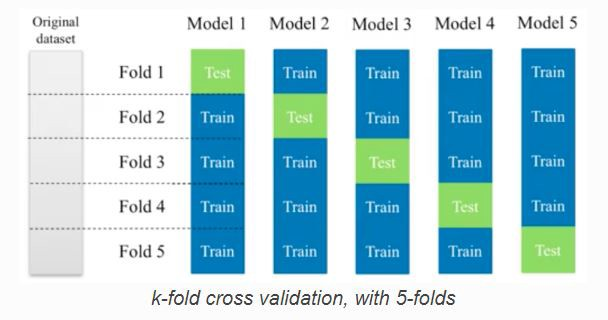

In [92]:
results = []
for k in range(1,int(len(y_train)**0.5),2):
    knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
    results.append ({
        'k': k,
        'accuracy': cross_val_score(knn, X, y, cv=5, scoring='accuracy'),
        'precision': cross_val_score(knn, X, y, cv=5, scoring='precision'),
        'recall': cross_val_score(knn, X, y, cv=5, scoring='recall'),
        'f1': cross_val_score(knn, X, y, cv=5, scoring='f1')
    })

results_df = pd.DataFrame(results)

In [1]:
results_df.to_csv('knn_kfold.csv') #will attch the csv file alon with submission

NameError: name 'results_df' is not defined

#### The csv file consists of all the values of the scoring metrices at all the k folds for each k value we will get a list of 5 values for each scoring metrices becasue our k fold is 5 the max of each scoring metrices  is also acheived at k=1 

#### The maximum f1 score is 1 and we got tha score at k=1 and kfold=1 which can be a over fitting model for the data.



## Decision tree

A decision tree uses a tree like structure to develop classification models. It incrementally develops an associated decision tree while segmenting a dataset into smaller and smaller sections. The outcome is a tree containing leaf nodes and decision nodes.

In [180]:
classTree = DecisionTreeClassifier(random_state=1)
_ = classTree.fit(X_train, y_train)

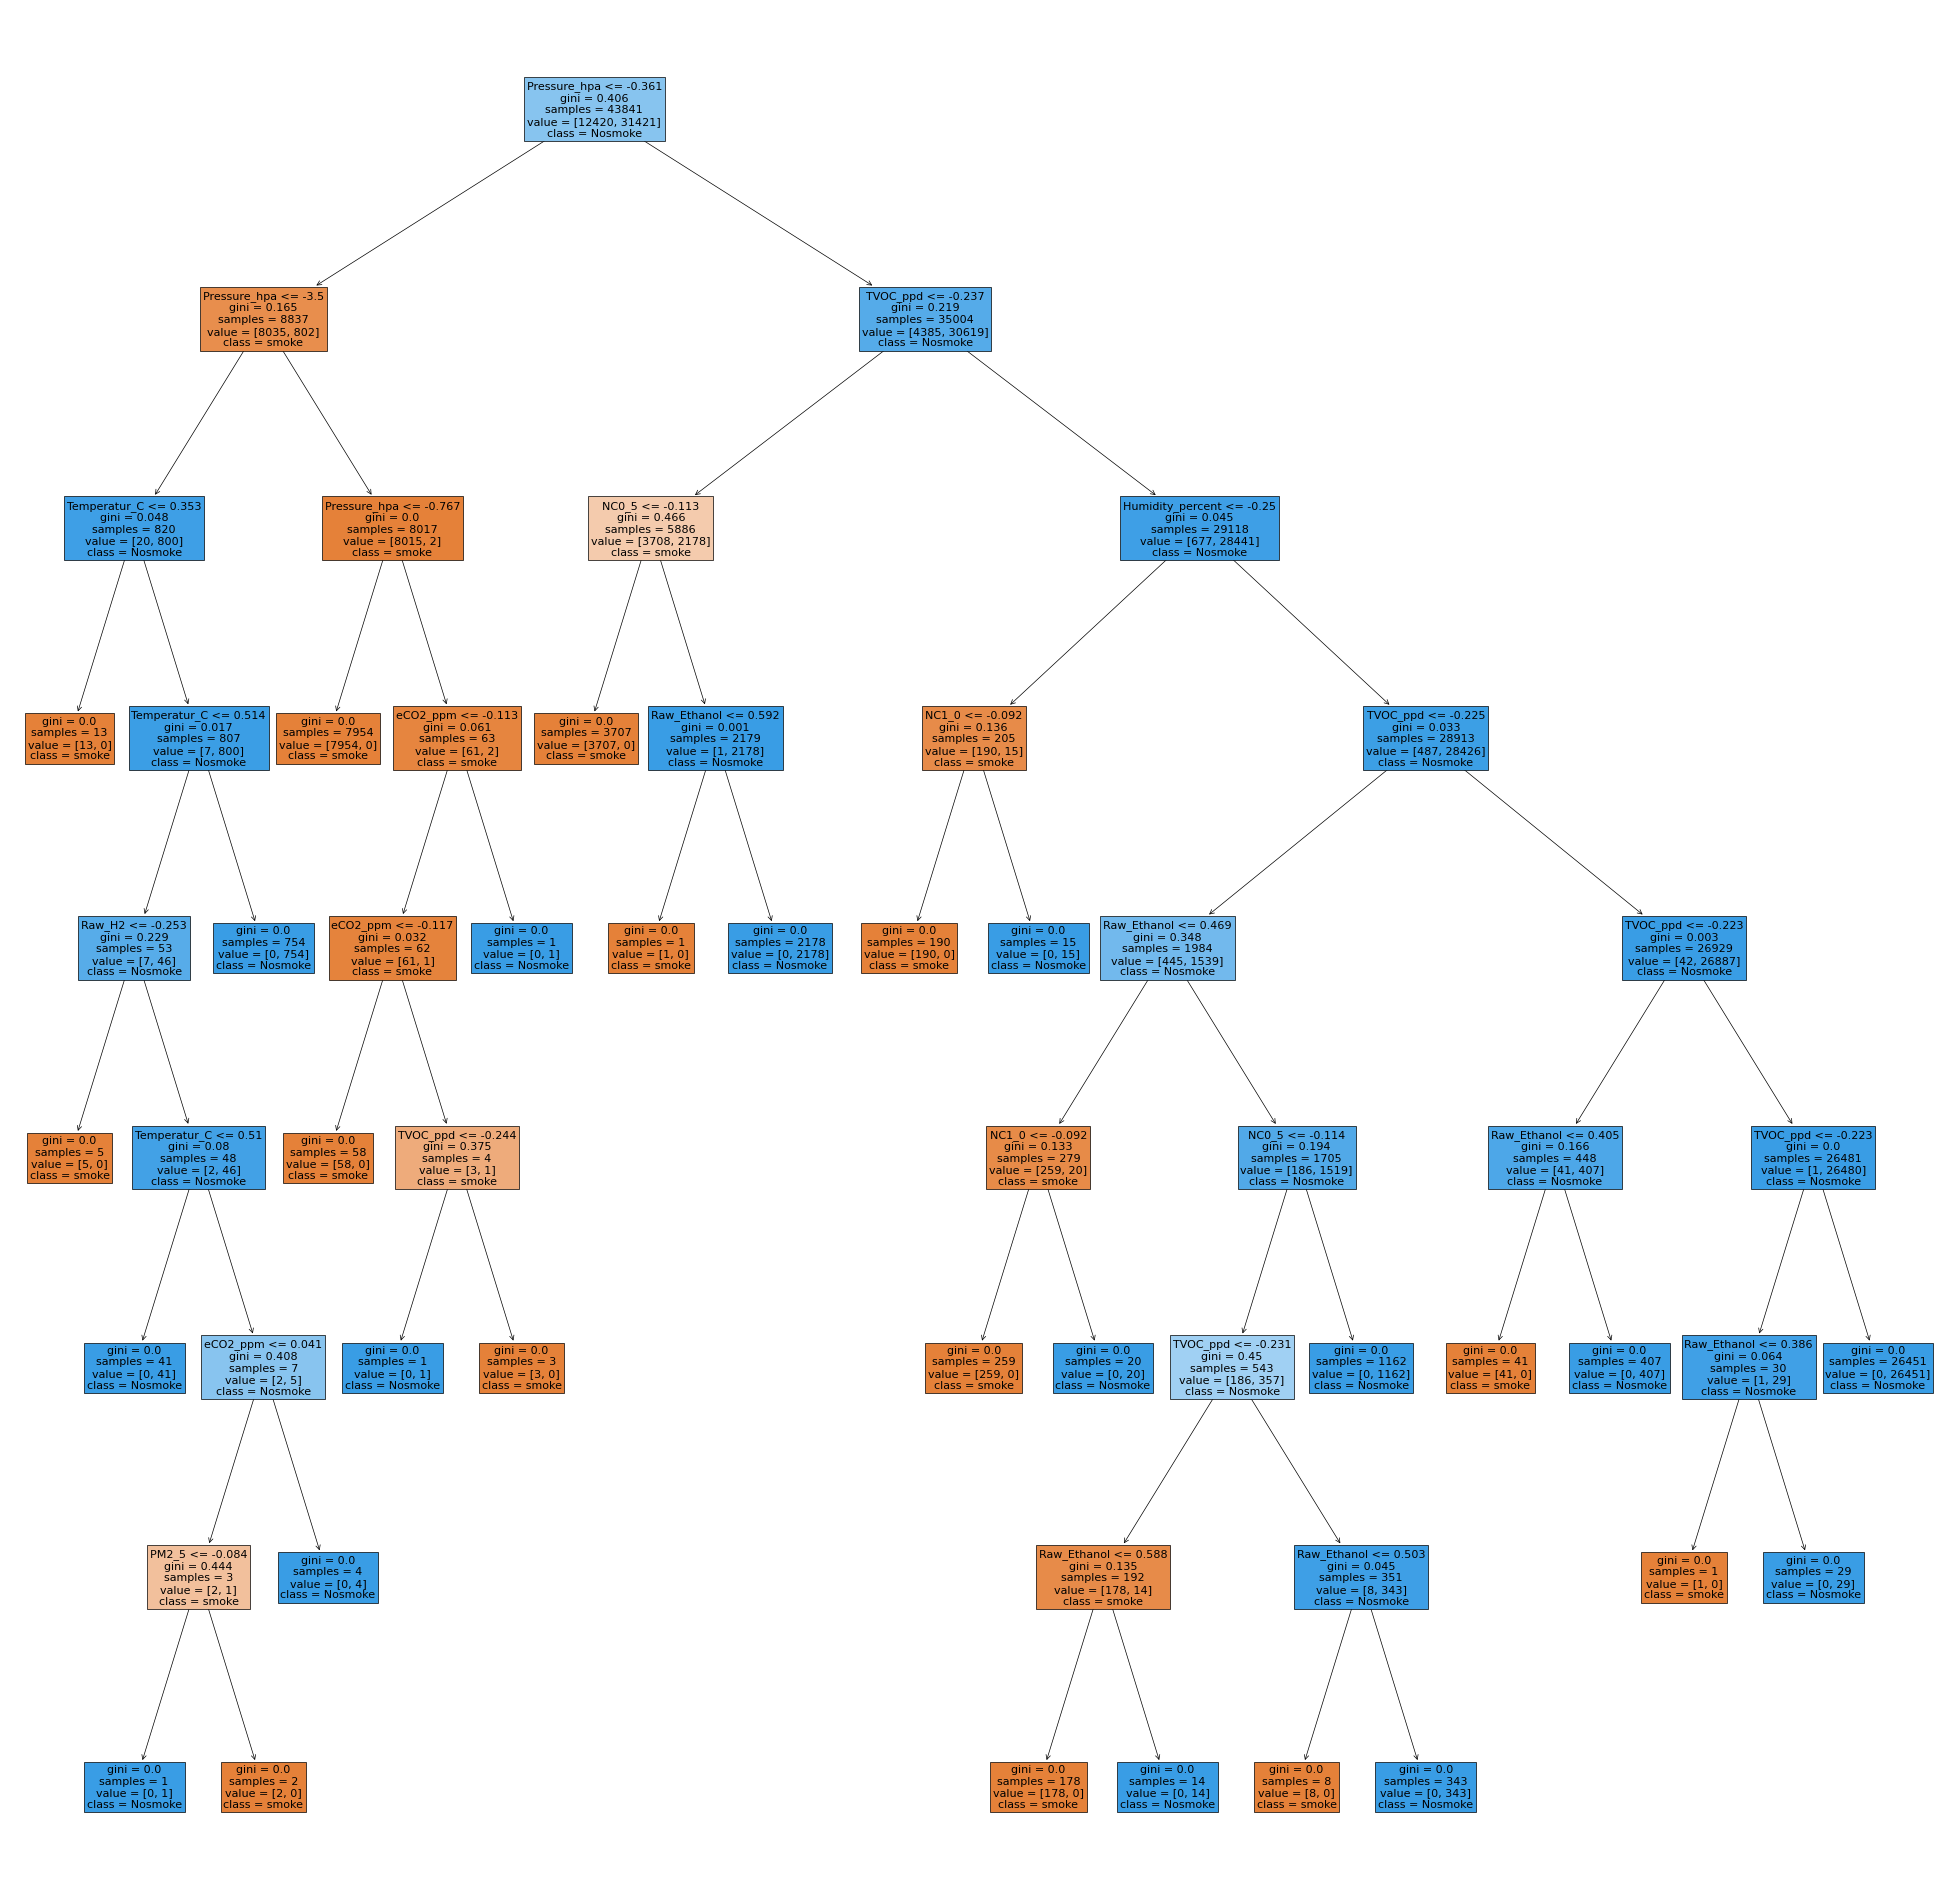

In [181]:
fig = plt.figure(figsize=(50,50), dpi=50)
_ = sk.tree.plot_tree(classTree, 
                feature_names=smoke_df.columns,  
                class_names=['smoke', 'Nosmoke'],
                filled=True,
                fontsize=16
             )

In [182]:
print(f"Accuracy=", accuracy_score(y_train, classTree.predict(x_train)))
print(f"Precision=", precision_score(y_train, classTree.predict(x_train)))
print(f"Recall=", recall_score(y_train, classTree.predict(x_train)))
print(f"f1=", f1_score(y_train, classTree.predict(x_train)))

Accuracy= 1.0
Precision= 1.0
Recall= 1.0
f1= 1.0


In [185]:
print(classification_report(y_test, classTree.predict(X_test), target_names=['Nosmoke', 'smoke']))

              precision    recall  f1-score   support

     Nosmoke       1.00      1.00      1.00      5453
       smoke       1.00      1.00      1.00     13336

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



As we know that decision tree will split ino nodes untile it fits the data and causes overfitting 
The same happend here the decision tree without prunning overfitted the data thats the reason we got all scoring metrices scores as 1.
The F1 score from Decision Tress without tunning is 1

## Decision tree with tunning

We perform the tunning to limit the parameters and reduce the over fitting of model to the data

In [189]:
train_X, valid_X, train_y, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [190]:
# Criterion used to guide data splits
crion = ['ritegini', 'entropy', 'log_loss']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.

max_depth = [int(x) for x in np.linspace(1, 40000, 50)]
# default = None

# Minimum number of samples required to split a node

min_samples_split = [int(x) for x in np.linspace(2, 5000, 50)]
# default is 2


# Minimum number of samples required at each leaf node

min_samples_leaf = [int(x) for x in np.linspace(1, 10000, 50)]
# default = 1 


# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
# default=None


# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]
# default=0.0

# Creating the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

In [251]:
dtree_default = DecisionTreeClassifier(random_state=random_seed)
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=random_seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 10, 
        cv=5, 
        verbose=0, 
        n_jobs = -1
    )
best_random_search_model = best_random_search_model.fit(X_train,y_train)

In [252]:
# getting the best parameters

random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 2756, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0073, 'max_leaf_nodes': 11504, 'max_depth': 19592, 'criterion': 'log_loss'}


In [253]:
y_pred = best_random_search_model.predict(valid_X)
print("************************************")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("************************************")

************************************
F1 Score:         0.9910063921510331
************************************
Accuracy Score:   0.9871201234765022
Precision Score:  0.9823902151488358
Recall Score:     0.9997750449910018
************************************


We can observe that by changing the parameter decision tree is not overfitting the data now. The f1 score from the decision tree after tunning is 0.99100 wich means the model is fitting the data well and can predict the output properly. The decision tree with tunning is so far the best model we have acheived.

## Random forest

A classification system made up of several decision trees is called the random forest. It attempts to produce an uncorrelated  trees whose result by combining is more accurate than that of any individual tree and this separation into multiple trees is done by using bagging and feature randomness.

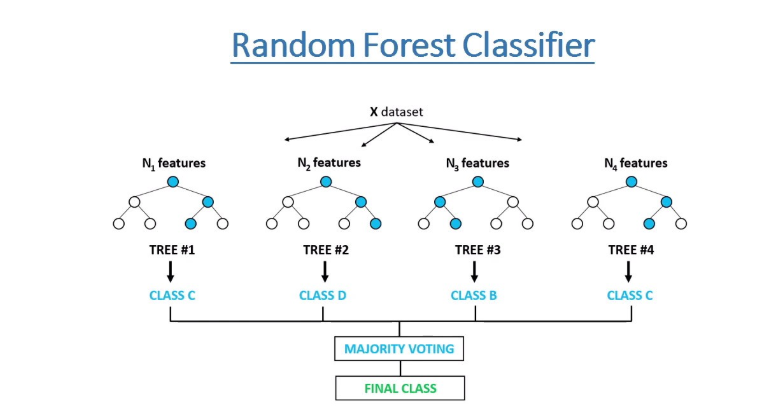

In [311]:
train_X,valid_X,train_y,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [312]:
rforest = RandomForestClassifier(random_state=1)

In [313]:
_ = rforest.fit(train_X, train_y)
y_pred = rforest.predict(valid_X)

In [314]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")

      Model             Score       
************************************
F1 Score:         0.9999250149970006
Recall Score:     0.9999250149970006
Accuracy Score:   0.9998935547394753
Precision Score:  0.9999250149970006


The f1 score of we acheived from the radom forest model without any tuning is 0.99992

## Random Forest with tunning



#### Getting the Area under curve score(auc score) with differnt n_estimators to find how the train and test set ae behaving at different n_estimator values

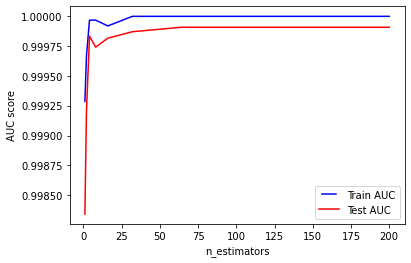

In [206]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = RandomForestClassifier(n_estimators=estimator)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, color='b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, color='r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

From the graph we can observ that the auc score at different values are changing simillarly for trian and test and the train set have more auc than the test set that means the model is over fitting for the train set and it failing to properly predict the ouput in test set 

In [208]:
# Doing RandomForestClassifer which hyper parameter tunning

rforest_tuning = RandomForestClassifier(random_state=1,max_depth=20,min_samples_split=2,n_estimators=25)

In [209]:
rforest = RandomForestClassifier(random_state=1)
_ = rforest.fit(train_X, train_y)
y_pred = rforest.predict(valid_X)

In [210]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9998935547394753
Accuracy Score:   0.9998935547394753
Precision Score:  0.9998935547394753
F1 Score:         0.9998935547394753


The f1 score for the random forest after hyper parameter tunning is 0.99893 which is less than the score acheived for random forest without tunning which means the model without hyper parameter tunning fits and predicts the output better than the model with less hyper parameter tunning.

## Gradeint Boost

It is predicated on the belief that when prior models are coupled with the best possible upcoming model, the overall prediction error is minimized. Setting the desired results for this subsequent model in order to reduce mistake is the important concept.

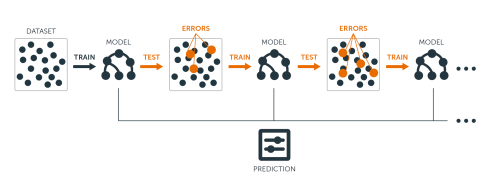

In [211]:
gboost = GradientBoostingClassifier(random_state=1)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(valid_X)

In [212]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9996806642184257
Accuracy Score:   0.9996806642184257
Precision Score:  0.9996807049428243
F1 Score:         0.9996806295772575


The f1 score acheived by the gradeint boost without tunning is 0.999680

## Gradeint Boost with prunning

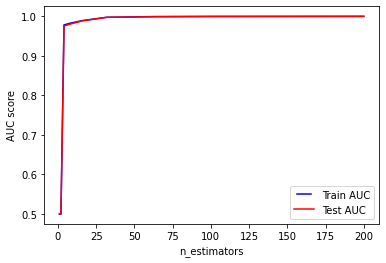

In [214]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, color='b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, color='r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We can observe that both auc curves are following the same path so the model acts same at all n_setimator values

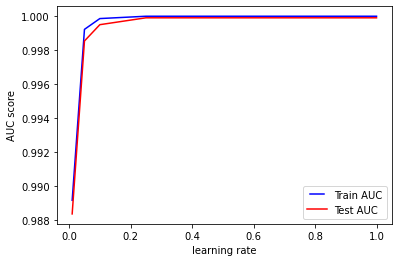

In [215]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()


Both lines where almost the same but we can observe that the train auc is more at around 0.2 learning rate which means at 0.2 learing rate the models fits the train set well but fails to properly predict the output of test set.

In [216]:
#Gradient boost classifer with hyper paramter tunning

gboost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=32,subsample=0.5)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(valid_X)

In [217]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9980839853105541
Accuracy Score:   0.9980839853105541
Precision Score:  0.9980838737133509
F1 Score:         0.9980832565281244


The f1 score of the gradeint boost with hyper parameter tunning is 0.99808 which is less than the gradeint boosting without hyperparamter tunning 

## XG BOOST

XGBoost is a distributed gradient boosting library that has been developed to be very effective, adaptable, and portable.It is a parallel tree boosting and is available to quickly and accurately address a variety of data science issues.
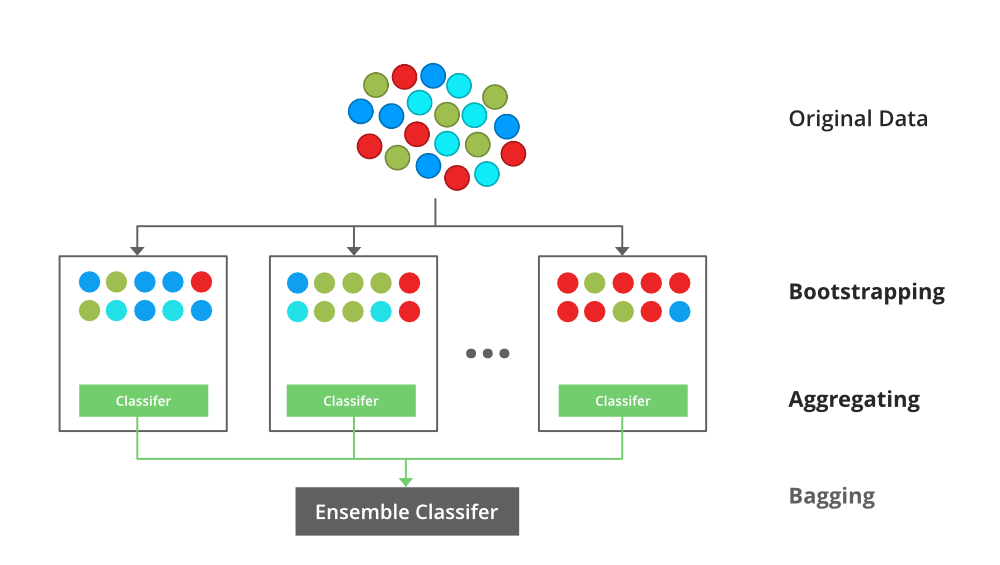

In [222]:
xgboost = XGBClassifier(random_state=1)
_ = xgboost.fit(train_X, train_y)
y_pred = xgboost.predict(valid_X)

In [223]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9997871094789504
Accuracy Score:   0.9997871094789504
Precision Score:  0.9997871733141891
F1 Score:         0.9997870863848383


The f1 score of XG boost without hyper parametertunnig is 0.999787

## XG BOOST WITH TUNNING

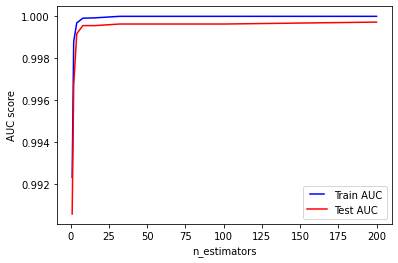

In [224]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = XGBClassifier(n_estimators=estimator)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, color='b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, color='r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We can observe that, on the train test the model is fitting the data well but it is no predicting the output of the test set properly so the auc of the train set is more than the auc of the test set

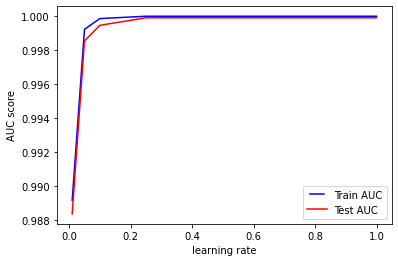

In [225]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

Even at differnt learning rates the model is fittig the train set well but at learnig rate 0.1 the model fails to predict the output properly

In [226]:
#XG boost classifer with hyper parameter tunning

xgboost = XGBClassifier(random_state=1,max_depth=20,learning_rate=0.1,subsample=0.5,n_estimator=16)

In [227]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9926552770237905
Accuracy Score:   0.9926552770237905
Precision Score:  0.9926835243550742
F1 Score:         0.992635009729686


F1 score of xg boost with hyper paramter tunning is 0.992635 which is almost the same as the F1 scoring without hyper parameter tunning(0.9997).

## ADA boost

An AdaBoost classifier is a meta-estimator that starts off evolved through becoming a classifier at the unique dataset after which suits extra copies of the classifier at the equal dataset however  the weights of incorrectly categorised times are adjusted such that next classifiers attention greater on tough cases.

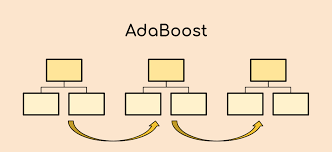

In [228]:
aboost = AdaBoostClassifier(random_state=1)
_ = aboost.fit(train_X, train_y)
y_pred = aboost.predict(valid_X)

In [229]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9993613284368513
Accuracy Score:   0.9993613284368513
Precision Score:  0.9993613284368513
F1 Score:         0.9993613284368513


The f1 score of ADA boost without tunning is 0.99936

## ABA boost with tunning

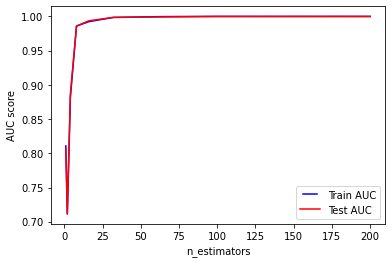

In [230]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = AdaBoostClassifier(n_estimators=estimator)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, color='b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, color='r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

From graph we can observe that both the sets have the same auc values at different n_estimators 

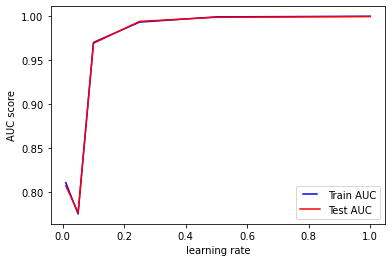

In [231]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model =AdaBoostClassifier(learning_rate=eta)
   model.fit(train_X, train_y)
   train_pred = model.predict(train_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(valid_X)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()


Even for different learning rates both sets have same auc value

In [232]:
#ada boost with hyper parameter tunning

aboost = AdaBoostClassifier(random_state=1, n_estimators=100,learning_rate=0.8)
_ = aboost.fit(train_X, train_y)
y_pred = aboost.predict(valid_X)

In [233]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

      Model             Score       
************************************
>> Recall Score:  0.9994677736973762
Accuracy Score:   0.9994677736973762
Precision Score:  0.9994677736973762
F1 Score:         0.9994677736973762


The f1 score of the ADA boost after hyer paramtere tunning is 0.9994677 which is more than the 1 score of adaboost without hyperparameter tunning

## Machine learning classifier

In [241]:
X_names = list(smoke_df.columns)
X_names.remove('Fire_Alarm')
X = smoke_df[X_names]
y = smoke_df['Fire_Alarm']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [243]:
#Machine learnng classifer for layer sizes=(60,50,40)and adam solver with maximum iternation of 200

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

In [244]:
y_pred = ann.predict(X_test)

In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5453
           1       0.99      0.98      0.98     13336

    accuracy                           0.98     18789
   macro avg       0.97      0.97      0.97     18789
weighted avg       0.98      0.98      0.98     18789



The f1 score of the machine learning classifer is 0.98 as there is data imbalance we will consider the weighted avg

In [246]:
ann2 = MLPClassifier(hidden_layer_sizes=(100,50,25), solver='lbfgs', max_iter=100)
_ = ann2.fit(X_train, y_train)

C:\Users\arihe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [247]:
y_pred = ann.predict(X_test)

In [248]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5453
           1       0.99      0.98      0.98     13336

    accuracy                           0.98     18789
   macro avg       0.97      0.97      0.97     18789
weighted avg       0.98      0.98      0.98     18789



We are getting the same validatio scores for different hidden layer sizes and differnt solver

# Conclusion

We have completed fitting different models and finding all evaluation metrices for each model before and after hyper parameter tunning. As we have the data imabalance issue we are considering the f1 score as the best evalution metrices to evaluate our models and decide on the best model.

>K nearest neighbour
    
- The f1 score before using k fold is 0.999715 but we got this at k=1 which always gives us the best scores we cannot really consider 1 as the optimal k so the good starting point in determining a k value is to try the square root of the total observations. Since there are 62630 observations, following this rule of thumb, we would select a k value of 250.25 but lets round it to an odd number and use 251. so the f1 score at k=251 is 0.993
   
- The F1 score after using k fold corss validation is 1 at k=1 and kfold=1 which is over fitting the data and at k=1 we have more chance to get the overfitting score so by following the rule of thumb lets consider the best F1 score at k=207(sqaure root of number of observation in the traning set) and i.e F1=1 at kfold=4 which again is overfitting the data so the next optimal value of f1 is at k=207 is 0.99916 at kfold=3 and k=207


    
#### Conclusion for knn:
    For Knn the best model is knn with k fold because the model with k fold will have more ittertaions and gives us the better analysis than the model without k fold and also if we consider the best f1 score the model with k fold cross validation have the best score i.e 0.9916.
    
    
    
    
    
    
> Decision Tree

- The F1 score before hyper parameter tunning is 1. We know that the decision tree will always try to overfit the data by splitting it untile it fits the data perfectly so the value 1 indicates that the model is over fitting the data as we can observ from the confusion matrix that there are false positives and flase negatives.
- The F1 score after hyper parameter tunning is0.9910. There is a significant change in the F1 score after playing around with various parameters(hyper paramter tunning)
    
    
    
#### Conclusion for Decision Tree:
    The best model amoung both of decision tree models is the model with hyper parameter tunning as the model without hyper paramter tunning is trying to overfit the data and the best f1 score is 0.9910
    
    
    
    
    
    
    
> Random Forest
    
- The F1 score before hyper parameter tunning is 0.99992 
- The F1 score after hyper parameter tunning is als 0.99989
    
    
    
#### Conclusion for Random Forest
    We have got same f1 score for the model before hyper tunning is more than the f1 score of model after hyper parameter tunning which means this model without hyper parameter tunning fits the data well and predicts the output better and the best F1 score for random forest is 0.99992
    
    
    
    
    
    
    
>Gradeint Boosting

- The F1 score before hyper parameter tunning is 0.99968
- The F1 score after hyper parameter tunning is 0.99808
  
  
  
#### Conclusion for Gradeint Boosting
     The f1 score has decreased after doing the hyper parameter tunning. So the final f1 score from the Gradeint Boosting is 0.99968 achevied by the model without hyper parameter tunning
    
    
    
    
    
    
    
>XG Boosting

- The F1 score before hyper parameter tunning is 0.999787
- The F1 score after hyper parameter tunning is 0.99263
    
  
#### Conclusion for XG Boosting
     The f1 score has decreased after doing the hyper parameter tunning. So the final f1 score from the XG Boosting is 0.99978 achevied by the model without hyper parameter tunning
    
    
> ADA Boosting

- The F1 score before hyper parameter tunning is 0.999361
- The F1 score after hyper parameter tunning is 0.99946
    
#### Conclusion for ADA Boosting
    The f1 score has increaded for the ADA boost after doing the hyper parameter tunning on the model.So the best f1 score from the ADA Boosting model is 0.99946
    
> Machine learning classifier

#### Conclsuion for Machine Learning Clasifer
    The best f1 score acheived from the Machine learning calssification is f1=0.98 with hidden layer sizes (60,50,40) with maximum iterations of 200 and adam solver

#### Best Model

Choosing the best model for this data set is difficult beacause all the models have almost same f1 score and most of the model have f1 score close to 1 and few have f1 scores equalto 1,overfitting the data. So from the value of the f1 scores we can decide that the best model is "Random Forest" as it have the highes f1 score of all the models. And in Random Forest before hyper parameter tunning have the highest f1 score. The Random forest with hyper parameter tunning also have almost same score so lets consider the model with hyper parameter tunning as the best model because using hyper parameter tunning can reduce the chances of overfitting the data and as both have almost the same F1 score chossing this over that model is not a probelm. Getting almost the high f1 score even after hyper paramter tunning means this models is fitting and predicting the data well.

#### What next?

Now that we have our best model we can give this model to the author so that he can deploy this model to his AI smoke detector and predict the smoke when it gets all the required input values from various sensors he have on his device.